In [1]:
import ampal
import isambard
import isambard.specifications as specs
import isambard.modelling as modelling
import isambard.optimisation.evo_optimizers as ev_opts
from isambard.optimisation.evo_optimizers import Parameter
import budeff

import matplotlib.pyplot as plt
import numpy as np
import itertools
from pprint import pprint
import nglview as nv
from contextlib import redirect_stdout

%matplotlib inline

In [2]:
def show_ball_and_stick(ampal):
    view = nv.show_text(ampal.pdb)
    view.add_ball_and_stick()
    view.remove_cartoon()
    return view

In [3]:
REGISTER_ADJUST = {
    'a': 0,
    'b': 102.8,
    'c': 205.6,
    'd': 308.4,
    'e': 51.4,
    'f': 154.2,
    'g': 257
}

In [4]:
specification = specs.CoiledCoil.from_parameters

In [5]:
sequences = ['ENQSLEQENSQLKQEISQLEQEIQQLHYG', 'ENQSLEQENSQLKQEISQLEQEIQQLHYG']

In [11]:
parameters = [
    Parameter.static('Oligomeric State', 2),
    Parameter.static('Helix Length', 29),
    Parameter.dynamic('Radius', 5.0, 1.0),
    Parameter.dynamic('Pitch', 200, 60),
    Parameter.dynamic('PhiCA', REGISTER_ADJUST['g'], 27),  
]

In [12]:
default_values = [x.default_value for x in parameters]
print(default_values)

[2, 29, 5.0, 200, 257]


In [13]:
def get_bude_total_energy(ampal_object):
    return budeff.get_internal_energy(ampal_object).total_energy

### Genetic Algorithm

In [14]:
opt_ga = ev_opts.GA(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [15]:
opt_ga.run_opt(100, 30, cores=8)

gen	evals	avg     	std    	min     	max     
0  	86   	-833.214	33.7157	-913.984	-784.103
1  	56   	-865.048	27.789 	-920.85 	-818.413
2  	60   	-889.859	16.4284	-927.545	-855.862
3  	72   	-903.695	8.98082	-928.781	-889.645
4  	85   	-909.857	7.4013 	-929.447	-900.243
5  	76   	-913.309	7.05494	-930.975	-904.732
6  	65   	-918.505	7.53007	-931.143	-908.228
7  	72   	-924.805	5.30581	-932.532	-913.984
8  	82   	-928.464	2.75404	-932.532	-920.158
9  	77   	-929.932	1.36427	-933.687	-926.665
10 	64   	-930.363	1.26325	-934.357	-927.438
11 	76   	-930.813	1.01761	-934.357	-929.141
12 	63   	-930.893	1.0927 	-934.357	-929.158
13 	82   	-931.609	1.05113	-935.097	-930.261
14 	55   	-931.451	1.62052	-935.097	-918.956
15 	67   	-931.973	1.19563	-936.503	-930.487
16 	70   	-930.83 	4.61961	-936.503	-912.944
17 	66   	-932.403	1.2657 	-936.503	-930.893
18 	71   	-932.718	1.23224	-936.503	-931.289
19 	74   	-932.677	1.21105	-936.503	-931.294
20 	87   	-932.595	1.19579	-936.503	-930.813
21 	65   	

In [16]:
optimized_model_ga = opt_ga.best_model

In [17]:
budeff.get_internal_energy(optimized_model_ga).total_energy

-936.5032373670965

In [18]:
funnel_data_ga = opt_ga.make_energy_funnel_data()

In [19]:
xs = [x[0] for x in funnel_data_ga]
ys = [x[1] for x in funnel_data_ga]
zs = [x[2] for x in funnel_data_ga]

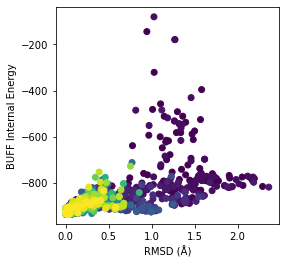

In [20]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUFF Internal Energy')

fig.savefig('ga.png')

In [21]:
f = open('switcch-optimized-model-ga.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_ga.pdb)

### Differential Evolution

In [22]:
opt_de = ev_opts.DE(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [23]:
opt_de.run_opt(100, 30, cores=8)

gen	evals	avg     	std    	min     	max    
0  	100  	-804.888	63.5328	-924.762	-549.52
1  	100  	-835.806	42.0012	-924.762	-716.559
2  	100  	-855.2  	34.4642	-924.762	-781.013
3  	100  	-871.268	27.3192	-924.762	-807.233
4  	100  	-883.127	22.0382	-924.762	-812.754
5  	100  	-891.163	17.7782	-924.911	-830.501
6  	100  	-900.428	11.1223	-924.911	-872.324
7  	100  	-904.742	9.91083	-924.911	-874.74 
8  	100  	-908.361	8.74426	-924.911	-888.867
9  	100  	-911.511	8.06819	-925.19 	-888.867
10 	100  	-914.005	6.44882	-925.19 	-896.629
11 	100  	-916.476	5.4892 	-925.19 	-903.609
12 	100  	-918.003	5.29726	-932.782	-903.609
13 	100  	-919.206	4.59976	-932.782	-910.395
14 	100  	-920.701	4.45356	-932.782	-910.395
15 	100  	-921.589	4.25311	-932.782	-910.967
16 	100  	-922.553	3.79862	-932.782	-911.731
17 	100  	-923.454	3.77207	-933.041	-912.231
18 	100  	-924.075	3.66311	-933.041	-914.432
19 	100  	-924.508	3.39401	-933.041	-914.432
20 	100  	-924.893	3.41463	-933.041	-914.432
21 	100  	-9

In [24]:
optimized_model_de = opt_de.best_model
budeff.get_internal_energy(optimized_model_de).total_energy

-935.6621784546073

In [25]:
funnel_data_de = opt_de.make_energy_funnel_data()

In [26]:
xs = [x[0] for x in funnel_data_de]
ys = [x[1] for x in funnel_data_de]
zs = [x[2] for x in funnel_data_de]

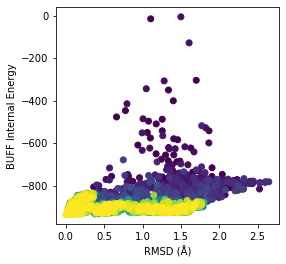

In [27]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUFF Internal Energy')

fig.savefig('de.png')

In [28]:
f = open('switcch-optimized-model-de.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_de.pdb)

### Particle Swarm Optimisation

In [29]:
opt_pso = ev_opts.PSO(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [30]:
opt_pso.run_opt(100, 30, cores=8)

gen	evals	avg     	std    	min     	max    
0  	100  	-751.507	167.155	-904.801	-73.224
1  	83   	-770.849	132.113	-912.165	-188.726
2  	55   	-712.649	172.505	-918.467	75.0207 
3  	60   	-736.274	172.451	-894.446	75.0207 
4  	80   	-803.01 	109.778	-931.304	-310.847
5  	82   	-817.31 	118.217	-906.998	32.7188 
6  	68   	-798.727	124.832	-903.538	32.7188 
7  	78   	-817.275	83.695 	-906.121	-557.317
8  	81   	-807.129	104.501	-914.553	-378.143
9  	90   	-813.74 	122.935	-911.755	62.307  
10 	88   	-786.209	145.139	-916.674	62.307  
11 	91   	-837.992	84.9149	-926.619	-368.467
12 	78   	-830.592	81.2567	-918.27 	-368.467
13 	78   	-747.434	162.891	-906.2  	-164.232
14 	89   	-782.882	136.283	-906.2  	-54.6114
15 	91   	-807.546	127.022	-915.941	-54.6114
16 	75   	-821.321	67.5999	-900.886	-540.802
17 	73   	-817.892	72.421 	-906.535	-540.802
18 	49   	-772.968	127.783	-918.794	-183.02 
19 	70   	-783.745	115.291	-903.81 	-183.02 
20 	88   	-825.42 	82.9495	-919.562	-488.234
21 	86   	-7

In [31]:
optimized_model_pso = opt_pso.best_model
budeff.get_internal_energy(optimized_model_pso).total_energy

-931.3043504173093

In [32]:
funnel_data_pso = opt_pso.make_energy_funnel_data()

In [33]:
xs = [x[0] for x in funnel_data_pso]
ys = [x[1] for x in funnel_data_pso]
zs = [x[2] for x in funnel_data_pso]

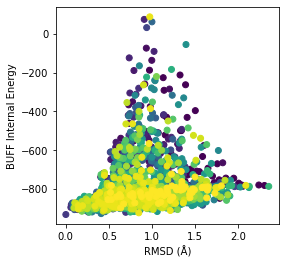

In [34]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUFF Internal Energy')

fig.savefig('pso.png')

In [35]:
f = open('switcch-optimized-model-pso.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_pso.pdb)

### Covariance Matrix Adaptive Evolutionary Strategy

In [36]:
opt_cmaes = ev_opts.CMAES(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [37]:
opt_cmaes.run_opt(100, 30, cores=8)

gen	evals	avg     	std    	min     	max     
0  	100  	-710.788	139.906	-869.457	-269.598
1  	100  	-751.018	146.344	-894.78 	23.5674 
2  	100  	-821.348	72.306 	-898.248	-494.782
3  	100  	-858.295	40.2926	-923.983	-710.702
4  	100  	-858.825	50.6259	-919.669	-684.225
5  	100  	-893.075	19.7397	-924.413	-785.709
6  	100  	-904.101	11.7604	-926.883	-866.151
7  	100  	-914.422	8.32097	-926.598	-896.835
8  	100  	-922.251	4.05731	-926.884	-900.79 
9  	100  	-922.724	4.92592	-926.549	-901.449
10 	100  	-924.086	4.32295	-926.762	-901.837
11 	100  	-925.526	1.19399	-926.966	-922.764
12 	100  	-925.431	1.88592	-927.024	-915.069
13 	100  	-925.07 	4.5885 	-926.971	-905.013
14 	100  	-926.28 	2.23418	-926.993	-905.549
15 	100  	-926.152	1.35793	-927.091	-920.883
16 	100  	-925.934	2.4648 	-927.087	-905.701
17 	100  	-926.14 	1.28475	-927.152	-923.947
18 	100  	-926.465	1.11157	-927.129	-923.994
19 	100  	-926.532	1.1625 	-927.179	-920.947
20 	100  	-926.194	1.31809	-927.133	-923.705
21 	100  	

In [38]:
optimized_model_cmaes = opt_cmaes.best_model
budeff.get_internal_energy(optimized_model_cmaes).total_energy

-927.1993628001933

In [39]:
funnel_data_cmaes = opt_cmaes.make_energy_funnel_data()

In [40]:
xs = [x[0] for x in funnel_data_cmaes]
ys = [x[1] for x in funnel_data_cmaes]
zs = [x[2] for x in funnel_data_cmaes]

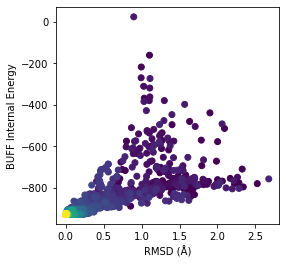

In [41]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUFF Internal Energy')

fig.savefig('cmaes.png')

In [42]:
f = open('switcch-optimized-model-cmaes.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_cmaes.pdb)